### Introduction to Natural Language Processing
##### Student Name:- Sahil Chitnis
##### Class:- MSc Data Analytics
##### Student ID:-  23100637

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 9.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 25.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.12.2
    Uninstalling fsspec-2023.12.2:
      Successfully uninstalled fsspec-2023.12.2

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer, TreebankWordDetokenizer
import string
from datasets import load_dataset
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pip install --user -U nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.7 MB/s eta 0:00:0000:010:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
nltk.download('treebank')
nltk.download('stopwords')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
Twitter_dataset_df_train=pd.read_csv(r'/kaggle/input/all-dataset/train.csv')
Twitter_dataset_df_dev=pd.read_csv(r'/kaggle/input/all-dataset/dev.csv')
Twitter_dataset_df_test=pd.read_csv(r'/kaggle/input/all-dataset/test.csv')

In [6]:
Twitter_dataset_df_train=pd.DataFrame(Twitter_dataset_df_train)
Twitter_dataset_df_dev=pd.DataFrame(Twitter_dataset_df_dev)
Twitter_dataset_df_test=pd.DataFrame(Twitter_dataset_df_test)

In [7]:
Twitter_dataset_df_train.head()

,textID,text,selected_text,sentiment
0,4921fcb7c4,absolutely gutted that i`m not going to badu t...,absolutely gutted that i`m not going to badu t...,negative
1,4137a2ac20,It is absolutely incredible. It`s official: M...,incredible.,positive
2,511d2b0355,I see,I see,neutral
3,fbd2944d44,Glad to hear you`re okay. Could have really h...,Glad to hear you`re okay. Could have really hu...,neutral
4,dd51596098,i saw a piece of that movie...loved it,..loved it,positive


In [9]:
Twitter_dataset_df_test.head()

,textID,text,selected_text
0,1ecb27d443,Packing up my desk,Packing up my desk
1,8def14ecb6,"wakey wakey lemon shakeyyyy! haha, goin` 2 sc...",I WISH
2,d8ab6dfc33,doin fine relaxin at work... Hardly working,Hardly working
3,a40a9840b0,Cant fall asleep.,Cant fall asleep.
4,9fd06d16fa,Day off with nothing to do,Day off with nothing to do


In [10]:
Twitter_dataset_df_dev.head()

,textID,text,selected_text,sentiment
0,a6fd34d3db,_Mean WHERE?,_Mean WHERE?,neutral
1,35e212c895,anytime.. Why ya gonna be up so late?,anytime.. Why ya gonna be up so late?,neutral
2,a962fad818,On the plane to yosemite. Forgot my laptop at ...,On the plane to yosemite. Forgot my laptop at ...,neutral
3,3521fb0d31,as long as you have someone to make out with...,as long as you have someone to make out with,neutral
4,2de1bcb225,"07 !!! It`s bloody quick,, even my gran could...","It`s bloody quick,, even my gran could drift it",neutral


In [11]:
counts_for_train = Twitter_dataset_df_train.groupby('sentiment').size()
counts_for_dev = Twitter_dataset_df_dev.groupby('sentiment').size()

order = ['negative', 'positive', 'neutral']
counts_for_train=counts_for_train.loc[order]
counts_for_dev=counts_for_dev.loc[order]

categories_train = counts_for_train.index
categories_dev = counts_for_dev.index

train_data = counts_for_train.values
dev_data = counts_for_dev.values

##Task 1a :- Plotting the graph


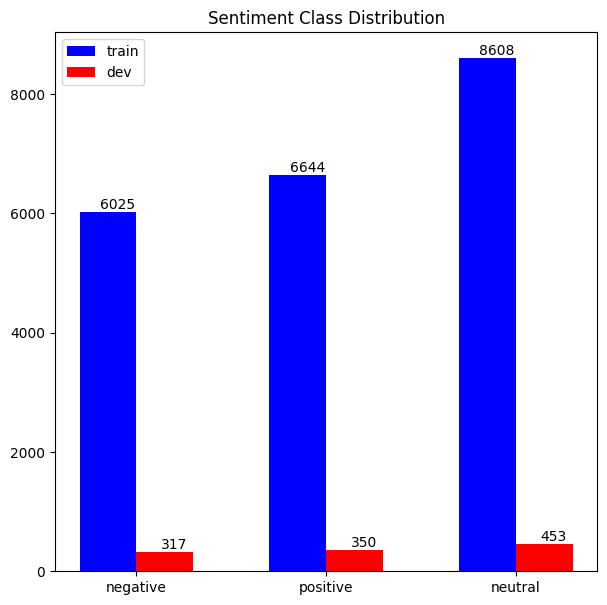

In [12]:
position = list(range(len(train_data)))
width = 0.30

fig, ax = plt.subplots(figsize=(7,7))

#using plt to visualize train data.
train_bar=plt.bar(position,
        train_data,
        width,
        alpha=1.0,
        color='blue',
        label=categories_train[0])

# using a for loop to iterate over the position so that the dev and train data appear next to each other
dev_bar=plt.bar([p + width for p in position],
        dev_data,
        width,
        alpha=1.0,
        color='r',
        label=categories_dev[1])


ax.set_title('Sentiment Class Distribution')


ax.set_xticks([p + 0.5 * width for p in position])


ax.set_xticklabels(categories_train)

#inorder to get the text on the barchar i have used for loop which will iterate the train_bar variable
for bar in train_bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/1.5, yval + 0.05, yval, ha='center', va='bottom')

for bar in dev_bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/1.5, yval + 0.05, yval, ha='center', va='bottom')

plt.legend(['train', 'dev'], loc='upper left')
plt.show()

## Sentiment Classification


In [13]:
Twitter_dataset_df_dev = Twitter_dataset_df_dev.dropna(subset=['text'])

In [14]:
labels = {
    0: "positive",
    1: "negative",
    2: "neutral"
}

Task 2A :- Pre-Processing and TF-IDF
---


 **For pe-processing i have used the stopwords function to remove the stopwords
and punctuations, i have also used TreebankWordTokenizer to create tokens and then reconstruct the sentense using TreebankWordDetokenizer. I have used TF-IDF inorder to get the input features for training and evalutaion.Also used label encoding to encode the sentiments.**

In [15]:
punct_list = list(string.punctuation)
english_stopwords = stopwords.words("english")
tokenizer = TreebankWordTokenizer()
detokenizer = TreebankWordDetokenizer()
def create_word_features(sentence):
    text = re.sub('\[.*?\]', '', sentence)
    text = re.sub('https?://\S+|www\.\S+', '', sentence)
    text = re.sub('<.*?>+', '', sentence)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', sentence)
    text = re.sub('\n', '', sentence)
    text = re.sub('\w*\d\w*', '', sentence)
    words = tokenizer.tokenize(text.lower())

    useful_words = [word for word in words if word not in english_stopwords and word not in punct_list]
    return detokenizer.detokenize(useful_words)

In [16]:
Twitter_dataset_df_train['text'] = Twitter_dataset_df_train['text'].apply(lambda x:create_word_features(x))
Twitter_dataset_df_train['selected_text'] = Twitter_dataset_df_train['selected_text'].apply(lambda x:create_word_features(x))

Twitter_dataset_df_dev['text'] = Twitter_dataset_df_dev['text'].apply(lambda x:create_word_features(x))

Twitter_dataset_df_test['text'] = Twitter_dataset_df_test['text'].apply(lambda x:create_word_features(x))


In [17]:
Twitter_dataset_df_train.head()

,textID,text,selected_text,sentiment
0,4921fcb7c4,absolutely gutted i`m going badu tonight. guys...,absolutely gutted i`m going badu tonight. guys...,negative
1,4137a2ac20,absolutely incredible. it`s official favorite ...,incredible,positive
2,511d2b0355,see,see,neutral
3,fbd2944d44,glad hear you`re okay. could really hurt sound...,glad hear you`re okay. could really hurt sound...,neutral
4,dd51596098,saw piece movie...loved,..loved,positive


In [18]:
Twitter_dataset_df_train['sentiment'].value_counts()

sentiment
neutral     8608
positive    6644
negative    6025
Name: count, dtype: int64

In [19]:
Twitter_dataset_df_dev['sentiment'].value_counts()

sentiment
neutral     452
positive    350
negative    317
Name: count, dtype: int64


Task 2A Continued
---


In the below lines of code we are using TF-IDF inorder to conver the text data into vectorised format.

In [20]:
## Extracting TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_features=5000,ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(Twitter_dataset_df_train['text'])
X_dev_tfidf = tfidf_vectorizer.transform(Twitter_dataset_df_dev['text'])

#We will do label encoding to assign labels to the sentiment. Here negative=0, neutral=1 and positive=2

label_encoder=LabelEncoder()
train_labels=label_encoder.fit_transform(Twitter_dataset_df_train['sentiment'])
dev_labels=label_encoder.fit_transform(Twitter_dataset_df_dev['sentiment'])

In [21]:
#SVM model training
SVM_Classifier=SVC()
SVM_Classifier.fit(X_train_tfidf,train_labels)

SVC()

**Task 2B**:- Precision,recall and F1 Scores are used to evaluate the performance of the model along with this micro average score to check the average performance of the model separately for all the classes. I have used the 'classification_report' function which gives us the classification report for the model, it gives the summary for the multi class classification problem.

In [22]:
dev_pred=SVM_Classifier.predict(X_dev_tfidf)

report=classification_report(dev_labels,dev_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.52      0.61       317
           1       0.60      0.77      0.68       452
           2       0.74      0.66      0.70       350

    accuracy                           0.67      1119
   macro avg       0.69      0.65      0.66      1119
weighted avg       0.68      0.67      0.67      1119



**Task 2C**:- Here i have used random forest as an alternative methodology because RF is a Ensemble Learning technique that builds multiple decision trees and combines their outputs. I have also implemented hyper parameter tuning to improve the performance of the RF algorithm. After comparing with the SVM it can be seen that RF performs better than SVM in all three of the evaluation metrices with Tf-IDF apprach. The accuracy improved from 67% to 68%. We get a better feature set with syntactic and semantic analysis by combining RF and Tf-IDF.

In [23]:
# Define the parameter grid
param_dist = {
  'n_estimators': [50, 200,800],
    'max_depth': [10, 20,30,60,800],
    'min_samples_split': [2, 5, 7,15],
    'min_samples_leaf': [1, 2, 4,6]
}


RF_classifier = RandomForestClassifier()


random_search = RandomizedSearchCV(estimator=RF_classifier, param_distributions=param_dist,
                                   n_iter=100, cv=23, verbose=1, n_jobs=-1)



# Training Random Forest with TFIDF features

random_search.fit(X_train_tfidf, train_labels)
print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_



# evaluation
preds = best_rf.predict(X_dev_tfidf)
report=classification_report(dev_labels,preds)
print(report)

Fitting 23 folds for each of 100 candidates, totalling 2300 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 800}
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       317
           1       0.65      0.73      0.69       452
           2       0.71      0.74      0.72       350

    accuracy                           0.69      1119
   macro avg       0.70      0.68      0.69      1119
weighted avg       0.69      0.69      0.69      1119



In [26]:
X_test_tfidf=tfidf_vectorizer.transform(Twitter_dataset_df_test['text'])
test_pred_RF=best_rf.predict(X_test_tfidf)
Twitter_dataset_df_test['predicted_sentiment']=label_encoder.inverse_transform(test_pred_RF)

**Task 2D**:- Generating the kaggle csv file

In [27]:
submission_df=pd.DataFrame({
    'textID':Twitter_dataset_df_test['textID'],
    'sentiment':label_encoder.inverse_transform(test_pred_RF)
})
submission_df.to_csv('23100637_Sahil_Chitnis.csv',index=False)

**3. Span Extraction**
**Task 3a:-**
1) Describe in no more than 200 words a system that could be used to identify the sentiment span. You should consider the methodology potentially including how features are extracted, what models could be used and what procedures should be used to train the model.                                            
***Answer***:- 

The following would be the new improved approach to focus on the sentiment span extraction:
* **Pre-Processing**:

* **NER and POS Tagging**:- Identifying the names and entities along with the Parts of Speech can be used to identify the sentiment span. Tokenization can also be carried out in the preprocessing step

* **Feature extraction**:
	For feature extraction we can use wordembedding such as word2vec or GloVe.

* **Model Selection**:
	Bidirectional LSTM's can learn contextual information for sentiment analysis which can provide better results than random forest and SVM.

* **Training**:
	For the training purpose we can use labeled dataset where sentiment spans are given(Similar to the given dataset for the assignment),train validation split can also be used. We can then tune the model using 
	grid search cv or randomized search cv. 

* **Evaluation**:-
	Different methods such as precision, recall, F1-Score can be used to evaluate the model's performance. We can also implement cross validation to assess the models general performance on the overall dataset.
    
    
    
2) Implement this system and apply it to the train and development splits of the dataset.

**Task 3b**

1) Describe an automatic metric that can be used to evaluate the task of span extraction. Implement this metric and use it to evaluate the performance of the system you developed in Task 3a.